# Preparando para tratar dados nulos

In [86]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [87]:
#Paleta de cores do carnaval
# Definindo a paleta de cores do carnaval

my_palette = sns.color_palette(['#0455BF', '#05C7F2', '#D95204'])

In [158]:
# Lendo o arquivo CSV e armazenando-o em um DataFrame

df=pd.read_csv('C:/Users/Public/df_new.csv')

In [89]:
# Renomeando uma coluna do DataFrame

df=df.rename(columns={'t_outromoivo':'t_outro_motivo'})

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.2                1581 non-null   int64  
 1   Unnamed: 0.1                1581 non-null   int64  
 2   index                       1581 non-null   int64  
 3   Unnamed: 0                  1581 non-null   int64  
 4   morador                     1581 non-null   object 
 5   bloco_classificacao         1581 non-null   object 
 6   numero_controle             1581 non-null   int64  
 7   bloco                       1581 non-null   object 
 8   dt_visita                   1581 non-null   object 
 9   dt_termino                  1581 non-null   object 
 10  tempo_total_entrev          1581 non-null   object 
 11  idade                       1581 non-null   int64  
 12  pais                        1581 non-null   object 
 13  estado                      1581 

In [90]:
# Separando os blocos em três classes distintas

maiores_blocos = ['Baianas Ozadas', 'MONOBLOCO', 'Entao Brilha', 'Bloco Despedida de Carnaval']
tamanho_metade = int(df.shape[0]/2)
menores_blocos = list(df['bloco'].sort_values()[:tamanho_metade].index)
df['bloco_classificacao'] = df['bloco']
df.loc[~df['bloco_classificacao'].isin(maiores_blocos + menores_blocos), 'bloco_classificacao'] = 'Outros'


In [91]:

coluna_a = df.pop('bloco_classificacao') # remove a coluna do DataFrame e a armazena em uma variável separada
df.insert(4, 'bloco_classificacao', coluna_a) # insere a coluna na posição 2

In [92]:
# Verificando os valores únicos de uma coluna

df['escolaridade'].unique()

array(['Ensino superior completo', 'Pos – Graduaçao – Mestrado',
       'Ensino superior incompleto', 'Ensino medio completo',
       'Ensino fundamental incompleto', 'Ensino medio incompleto',
       'Ensino tecnico', 'Pos – Graduaçao – Especializaçao',
       'Pos – Graduaçao – Doutorado', 'Ensino fundamental completo',
       'Nao respondeu'], dtype=object)

In [93]:
# Verificando a descrição do DataFrame

df.describe()

,Unnamed: 0.2,level_0,Unnamed: 0.1,index,Unnamed: 0,numero_controle,idade,t_qtpernoite,dias_carnaval,gasto_total,...,ingressos,outros,total,qtd_pessoas_gasto,aval_geral,aval_banheiros,aval_seguranca,aval_precos,faixa_renda,int_renda
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,218.000000,1581.000000,1581.000000,...,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,0.0,1581.000000
mean,790.000000,790.000000,790.000000,818.919039,818.919039,819.919039,30.543960,5.665138,3.841240,339.242694,...,8.490829,19.371284,335.261037,1.522454,5.194813,7.170778,6.663504,8.338393,NaN,4.951929
std,456.539703,456.539703,456.539703,475.287850,475.287850,475.287850,11.656046,12.611631,1.664817,458.704204,...,51.781559,113.676576,465.820195,1.043501,2.576181,2.217293,2.216021,1.383437,NaN,2.843196
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,395.000000,395.000000,395.000000,407.000000,407.000000,408.000000,22.000000,3.000000,2.000000,112.000000,...,0.000000,0.000000,100.000000,1.000000,3.000000,6.000000,5.000000,8.000000,NaN,3.000000
50%,790.000000,790.000000,790.000000,820.000000,820.000000,821.000000,28.000000,4.000000,4.000000,230.000000,...,0.000000,0.000000,210.000000,1.000000,5.000000,8.000000,7.000000,8.000000,NaN,4.000000
75%,1185.000000,1185.000000,1185.000000,1228.000000,1228.000000,1229.000000,37.000000,5.000000,5.000000,400.000000,...,0.000000,0.000000,400.000000,2.000000,7.000000,9.000000,8.000000,9.000000,NaN,6.000000
max,1580.000000,1580.000000,1580.000000,1644.000000,1644.000000,1645.000000,74.000000,180.000000,6.000000,10000.000000,...,1000.000000,2500.000000,10000.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,11.000000


In [162]:
# Criando outra coluna para classificar a renda:
df['faixa_renda'].value_counts()

De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)    533
De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)    430
Acima de 8 salários (acima de R$ 7.632,00)       295
De 1 a 2 salários (R$ 954,00 - R$ 1.908,00)      257
Até um salário mínimo (R$ 954,00)                 66
Name: faixa_renda, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                1581 non-null   int64  
 1   index                       1581 non-null   int64  
 2   Unnamed: 0                  1581 non-null   int64  
 3   morador                     1581 non-null   object 
 4   bloco_classificacao         1581 non-null   object 
 5   numero_controle             1581 non-null   int64  
 6   bloco                       1581 non-null   object 
 7   dt_visita                   1581 non-null   object 
 8   dt_termino                  1581 non-null   object 
 9   tempo_total_entrev          1581 non-null   object 
 10  idade                       1581 non-null   int64  
 11  pais                        1581 non-null   object 
 12  estado                      1581 non-null   object 
 13  cidade                      1581 

# Tratando dados nulos

In [95]:
# Removendo linhas que contenham valores específicos e redefinindo o índice do DataFrame

df=df.drop(df[df['faixa_renda']=='Nao respondeu'].index)
df=df.drop(df[df['faixa_renda']=='Nao sabe'].index)


In [96]:
df.loc[df['morador'] == 'Visitantes', 't_qtpernoite'] = df.loc[df['morador'] == 'Visitantes', 't_qtpernoite'].fillna(0)
#Preenchendo valores pagos de estadia por visitantes que não pernoitaram com 0, pois não pagaram nada de hospedagem.

In [97]:
df['t_hospedagem'].unique()

array([nan, 'Casa de Amigos/Parentes', 'Outros', 'Casa propria/alugada',
       'Hoteis/Pousadas', 'Outro   airbnb', 'Outro   carro',
       'Outro   aluguel de quarto', 'Albergue', 'Outro   flat'],
      dtype=object)

In [98]:
df.loc[df['morador'] == 'Visitantes', 't_pernoite'] = df.loc[df['morador'] == 'Visitantes', 't_pernoite'].fillna(0)
#Preenchendo valores pagos de estadia por visitantes que não pernoitaram com 0, pois não se hospedaram.

In [99]:
df.loc[df['morador'] == 'Visitantes', 't_hospedagem'] = df.loc[df['morador'] == 'Visitantes', 't_hospedagem'].fillna('Outros')
# Preenchendo hospedagens ausentes de visitantes com outros.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   level_0                     1581 non-null   int64  
 1   Unnamed: 0.1                1581 non-null   int64  
 2   index                       1581 non-null   int64  
 3   Unnamed: 0                  1581 non-null   int64  
 4   morador                     1581 non-null   object 
 5   bloco_classificacao         1581 non-null   object 
 6   numero_controle             1581 non-null   int64  
 7   bloco                       1581 non-null   object 
 8   dt_visita                   1581 non-null   object 
 9   dt_termino                  1581 non-null   object 
 10  tempo_total_entrev          1581 non-null   object 
 11  idade                       1581 non-null   int64  
 12  pais                        1581 non-null   object 
 13  estado                      1581 

In [11]:
# CHECANDO OS NULOS

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   level_0                     1581 non-null   int64  
 1   Unnamed: 0.1                1581 non-null   int64  
 2   index                       1581 non-null   int64  
 3   Unnamed: 0                  1581 non-null   int64  
 4   morador                     1581 non-null   object 
 5   bloco_classificacao         1581 non-null   object 
 6   numero_controle             1581 non-null   int64  
 7   bloco                       1581 non-null   object 
 8   dt_visita                   1581 non-null   object 
 9   dt_termino                  1581 non-null   object 
 10  tempo_total_entrev          1581 non-null   object 
 11  idade                       1581 non-null   int64  
 12  pais                        1581 non-null   object 
 13  estado                      1581 

In [13]:
df[df['t_hospedagem'].isnull()][df['morador']=='Visitantes']

C:\Users\gabri\AppData\Local\Temp\ipykernel_23112\1416726384.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['t_hospedagem'].isnull()][df['morador']=='Visitantes']


,level_0,Unnamed: 0.1,index,Unnamed: 0,morador,bloco_classificacao,numero_controle,bloco,dt_visita,dt_termino,...,escolaridade,estado_civil,faixa_renda,int_renda,nivel_gastos,categoria_escolaridade,categoria_transporte,categoria_hospedagem,categoria_regiao,faixa_etaria


In [100]:
df['t_transp'][df['morador']=='Visitantes'].unique()
df.loc[df['morador'] == 'Visitantes', 't_transp'] = df.loc[df['morador'] == 'Visitantes', 't_transp'].fillna('Outros')
# Preenchendo veículo de transporte de pessoas visitantes com outros.

In [101]:
df.loc[df['morador'] == 'Visitantes', 't_motivo'] = df.loc[df['morador'] == 'Visitantes', 't_motivo'].fillna('Nao respondeu')
# Colocando não respondeu, para quem não respondeu o motivo da visita na pesquisa.

In [102]:
df.loc[df['morador'] == 'Visitantes', 't_outro_motivo'] = df.loc[df['morador'] == 'Visitantes', 't_outro_motivo'].fillna('Nao respondeu')
# Colocando não respondeu, para quem não respondeu o motivo da visita na pesquisa.

In [103]:
def fill_gasto_total(row):
    if pd.isna(row['gasto_total']):
        return df['gasto_total'][row['dias_carnaval']]
    return row['gasto_total']        
df['gasto_total'] = df.apply(fill_gasto_total, axis=1)
# Preenchendo dados vazios de gasto total de acordo com tempo que permaneceu no carnaval.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.2                1581 non-null   int64  
 1   level_0                     1581 non-null   int64  
 2   Unnamed: 0.1                1581 non-null   int64  
 3   index                       1581 non-null   int64  
 4   bloco_classificacao         1581 non-null   object 
 5   Unnamed: 0                  1581 non-null   int64  
 6   morador                     1581 non-null   object 
 7   numero_controle             1581 non-null   int64  
 8   bloco                       1581 non-null   object 
 9   dt_visita                   1581 non-null   object 
 10  dt_termino                  1581 non-null   object 
 11  tempo_total_entrev          1581 non-null   object 
 12  idade                       1581 non-null   int64  
 13  pais                        1581 

In [105]:
df['t_hospedagem'][df['morador']=='Visitantes'][df['t_hospedagem.1'].isnull()]

Series([], Name: t_hospedagem, dtype: object)

In [106]:
df[['alimentacao', 'transporte_interno', 'compras', 'ingressos', 'outros', 'total']]=df[['alimentacao', 'transporte_interno', 'compras', 'ingressos', 'outros', 'total']].fillna(0)
# Preenchendo preços vazios com 0

In [107]:
df['qtd_pessoas_gasto']=df['qtd_pessoas_gasto'].fillna(1) 
# Preenchendo quantidades de pessoas vazias com 1 (Ao menos quem estava respondendo a pesquisa)

In [108]:
df.loc[df['morador'] == 'Visitantes', ['t_hospedagem.1', 't_atrativos_passeios']] = df.loc[df['morador'] == 'Visitantes', ['t_hospedagem.1', 't_atrativos_passeios']].fillna(0)
# Gastos com hospedagens e passeios vazios preenchidos com 0.

In [109]:
df[['evolucao', 'motivo']]=df[['evolucao', 'motivo']].fillna('Nao respondeu')
# Colocando os dados ausentes nas colunas de motivo de evolução e se evoluiu ou não como "Não respondeu"

In [110]:
df['motivo_nao']=df['motivo_nao'].fillna('Nao respondeu')


In [111]:
df['outro_patrocinador']=df['outro_patrocinador'].fillna('Nao possui')

In [112]:

faixas_preco=[0,500,1000,5000,float('inf')]
categoria=['Baixo', 'Médio', 'Alto', 'Muito alto']
df['nivel_gastos']=pd.cut(df['gasto_total'], bins=faixas_preco, labels=categoria)
# Categorizando níveis de gasto para plotagem de gráfico.

In [113]:
df['escolaridade'].unique()

array(['Ensino superior completo', 'Pos – Graduaçao – Mestrado',
       'Ensino superior incompleto', 'Ensino medio completo',
       'Ensino fundamental incompleto', 'Ensino medio incompleto',
       'Ensino tecnico', 'Pos – Graduaçao – Especializaçao',
       'Pos – Graduaçao – Doutorado', 'Ensino fundamental completo',
       'Nao respondeu'], dtype=object)

In [114]:
def categoriza_escolaridade(x):
    if x in ['Ensino fundamental incompleto', 'Ensino fundamental completo', 'Ensino medio incompleto', 'Ensino medio completo']:
        return 'Ensino Básico'
    elif x in ['Ensino superior completo', 'Ensino superior incompleto', 'Ensino tecnico']:
        return 'Graduado'
    elif x in ['Pos – Graduaçao – Mestrado', 'Pos – Graduaçao – Especializaçao', 'Pos – Graduaçao – Doutorado', 'MBA']:
        return 'Pós'
    else:
        return 'Outros'
    
df['categoria_escolaridade'] = df['escolaridade'].apply(categoriza_escolaridade)
# Categorizando níveis de estudo para plotagem de gráfico.

In [115]:
df['t_transp'].unique()

array([nan, 'Aviao', 'onibus rodoviario', 'Outros', 'Carro',
       'Outro   Carona', 'Trem', 'Outro   Uber', 'Taxi'], dtype=object)

In [116]:
def categoriza_transporte(x):
    if x in ['Aviao', 'onibus rodoviario', 'Trem']:
        return 'Transporte Coletivo'
    elif x in ['Carro', 'Outro   Carona']:
        return 'Transporte Privado'
    elif x in ['Outro   Uber', 'Taxi']:
        return 'Aplicativo'
    
df['categoria_transporte'] = df['t_transp'].apply(categoriza_transporte)
# Categorizando transportes para plotagem de gráfico.

In [117]:
def categoria_hospedagem(x):
    if x in ['Albergue', 'Outro   flat', 'Hoteis/Pousadas']:
        return 'Hospedagem'
    elif x in ['Outro   airbnb', 'Outro   aluguel de quarto']:
        return 'Airbnb'
    elif x in ['Casa de Amigos/Parentes', 'Casa propria/alugada']:
        return 'Casa'
    else:
        return 'Outros'
df['categoria_hospedagem'] = df['t_hospedagem'].apply(categoria_hospedagem)
# Categorizando hospedagens para plotagem de gráfico.

In [118]:
df['morador']

0          Morador
1          Morador
2          Morador
3          Morador
4          Morador
           ...    
1576       Morador
1577       Morador
1578       Morador
1579       Morador
1580    Visitantes
Name: morador, Length: 1581, dtype: object

In [119]:
df.loc[df['morador'] == 'Morador', ['bairro_bh', 'regiao_bh']] = df.loc[df['morador'] == 'Morador', ['bairro_bh', 'regiao_bh']].fillna('Desconhecido')
# Preenchendo endereços ausentes com desconhecido para moradores.

In [120]:
def categoria_regiao(x):
    if x in ['Minas Gerais', 'Sao Paulo', 'Rio de Janeiro', 'Espirito Santo']:
        return 'Sudeste'
    elif x in ['Mato Grosso do Sul', 'Goias']:
        return 'Centro-Oeste'
    elif x in ['Pernambuco', 'Maranhao', 'Rio Grande do Norte', 'Bahia', 'Ceara']:
        return 'Nordeste'
    elif x in ['Rio Grande do Sul', 'Santa Catarina', 'Parana']:
        return 'Sul'
    elif x in ['Amazonas']:
        return 'Norte'
df['categoria_regiao'] = df['estado'].apply(categoria_regiao)
# Agrupando regiões para plotagem de gráficos.

In [121]:
df['categoria_regiao']=df['categoria_regiao'].fillna('Desconhecido/Inter')

In [122]:
df.loc[df['morador'] == 'Visitantes', 'categoria_transporte'] = df.loc[df['morador'] == 'Visitantes', 'categoria_transporte'].fillna('Outros')


In [123]:
df[['estado', 'cidade']]=df[['estado', 'cidade']].fillna('Inter')
# COlocando nulos de estado ou cidade para "inter", pois são referentes aos foliões gringos.

In [146]:
# revised salary groups
salary_groups = ['Até um salário mínimo (R$ 954,00)',
                 'De 1 a 2 salários (R$ 954,00 - R$ 1.908,00)',
                 'De 2 a 4 salários (R$ 1.908,00 - R$ 3.816,00)',
                 'De 4 a 8 salários (R$ 3.816,00 - R$ 7.632,00)',
                 'Acima de 8 salários (acima de R$ 7.632,00)',
                 'Não sei',
                 'Prefiro não responder']

# create a dictionary mapping original salary ranges to revised salary groups
salary_map = {'Ate um salario minimo (R$ 954,00 )': salary_groups[0],
              'de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)': salary_groups[1],
              'de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)': salary_groups[2],
              'de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)': salary_groups[2],
              'de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)': salary_groups[3],
              'de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)': salary_groups[3],
              'de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)': salary_groups[3],
              'de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)': salary_groups[4],
              'de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)': salary_groups[4],
              'de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)': salary_groups[4],
              'Acima de 10 salarios (acima de R$ 9540,00)': salary_groups[4]}

# apply the mapping to the "faixa_renda" column
df['faixa_renda'] = df['faixa_renda'].map(salary_map)

# Exportando csv

In [161]:
df.to_csv('data.csv') 
# baixando df usado

In [153]:
df.to_csv('df_atual.csv')

In [152]:
df['bloco'].value_counts()

Baianas Ozadas                 524
MONOBLOCO                      268
Outros                         184
Entao Brilha                   145
Bloco Despedida de Carnaval    115
Juventude Bronzeada             95
Quando come se lambuza          85
Bloco Angola Janga              61
Bloco Havayanas Usadas          56
Tchanzinho Zona Norte           48
Name: bloco, dtype: int64

In [147]:
bins = [16, 24, 39, 59, 74]
labels = ['16 até 24 anos', '24 até 39 anos', '39 até 59 anos', '59 até 74 anos']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, include_lowest=True)

In [124]:
avals=['aval_geral', 'aval_banheiros', 'aval_seguranca', 'aval_precos']
for i in avals:
    df[i]=df[i].fillna(df[i].median())
# Calculando média de avaliações.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Unnamed: 0.2                1581 non-null   int64   
 1   level_0                     1581 non-null   int64   
 2   Unnamed: 0.1                1581 non-null   int64   
 3   index                       1581 non-null   int64   
 4   bloco_classificacao         1581 non-null   object  
 5   Unnamed: 0                  1581 non-null   int64   
 6   morador                     1581 non-null   object  
 7   numero_controle             1581 non-null   int64   
 8   bloco                       1581 non-null   object  
 9   dt_visita                   1581 non-null   object  
 10  dt_termino                  1581 non-null   object  
 11  tempo_total_entrev          1581 non-null   object  
 12  idade                       1581 non-null   int64   
 13  pais              

In [143]:
df_gastos = df[df['nivel_gastos']=='Muito alto']
print('Média da avaliação geral de pessoas com gastos altos {:.2f}'.format(df_gastos['aval_geral'].mean()))
print()
print('Média da avaliação geral: {:.2f}'.format(df['aval_geral'].mean()))

Média da avaliação geral de pessoas com gastos altos 1.00

Média da avaliação geral: 5.19


In [142]:
df_3idade = df[df['idade']>65]
print('Média da avaliação geral de pessoas com mais de 65 anos: {:.2f}'.format(df_3idade['aval_geral'].mean()))
print()
print('Média da avaliação geral: {:.2f}'.format(df['aval_geral'].mean()))

Média da avaliação geral de pessoas com mais de 65 anos: 6.47

Média da avaliação geral: 5.19


**FATO INTERESSANTE**: A avaliação de pessoas na faixa dos 70 anos parece ser acima da média, e as que gastaram valores absurdos, tiveram uma experiência abaixo da média.

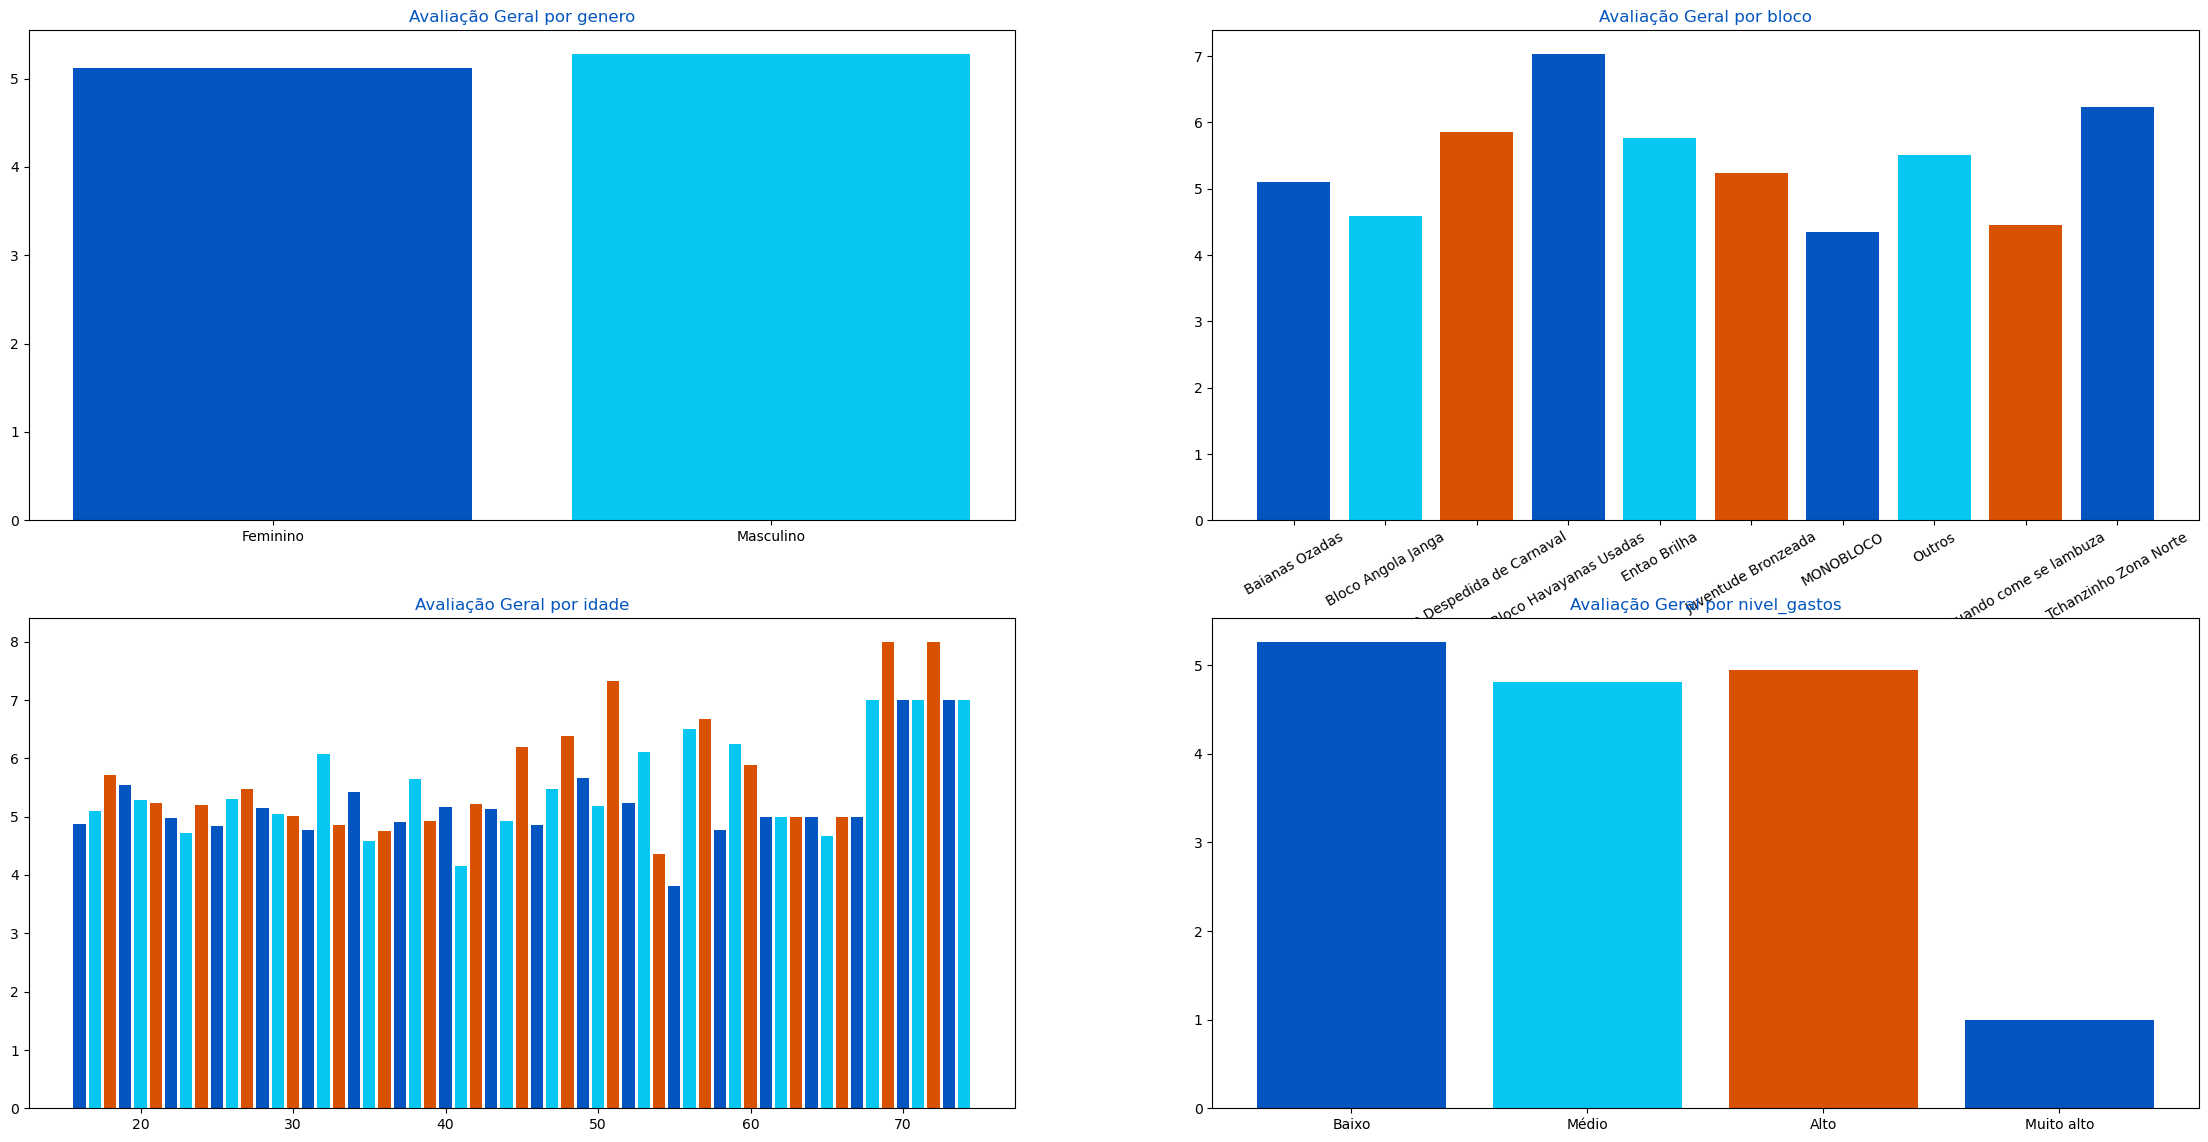

In [141]:
colunas=['genero', 'bloco', 'idade', 'nivel_gastos']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(28, 14)) 



for i, coluna in enumerate(colunas):
    row=i//2
    col=i%2
    df2=df.groupby(coluna, as_index=False).agg({'aval_geral':'mean'})
    axs[row, col].bar(df2[coluna], df2['aval_geral'], color=my_palette) 
    if coluna=='bloco':
        axs[row, col].tick_params(axis='x', rotation=30)
    axs[row, col].set_title('Avaliação Geral por {}'.format(coluna), color='#0455BF')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig('grafico_avaliacao_4.png', transparent=True)
plt.show()

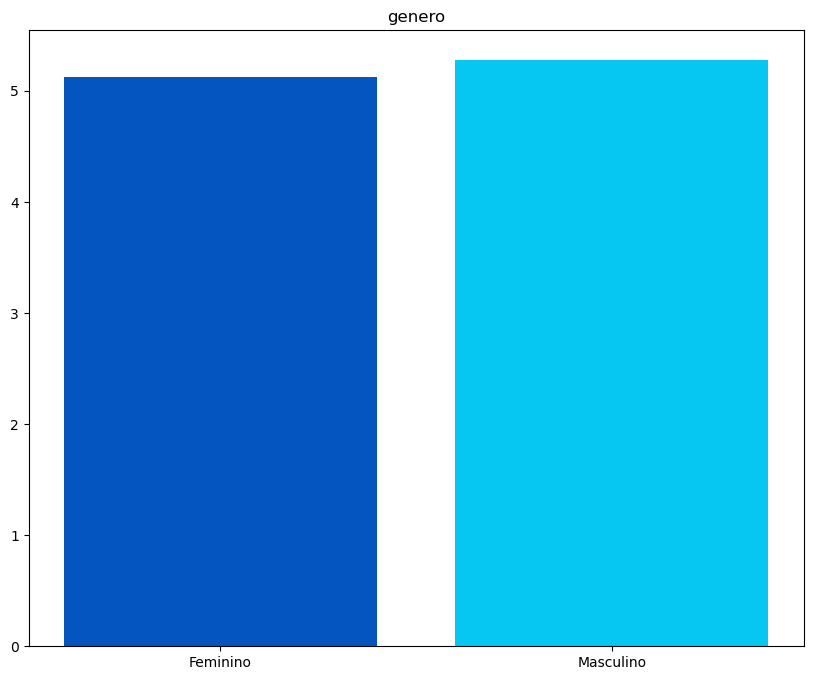

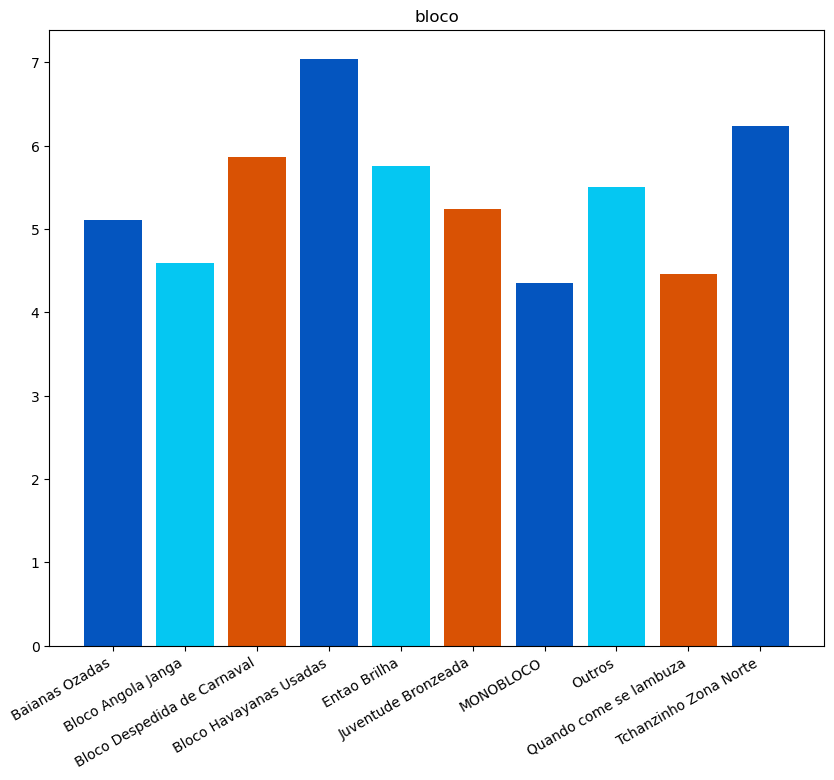

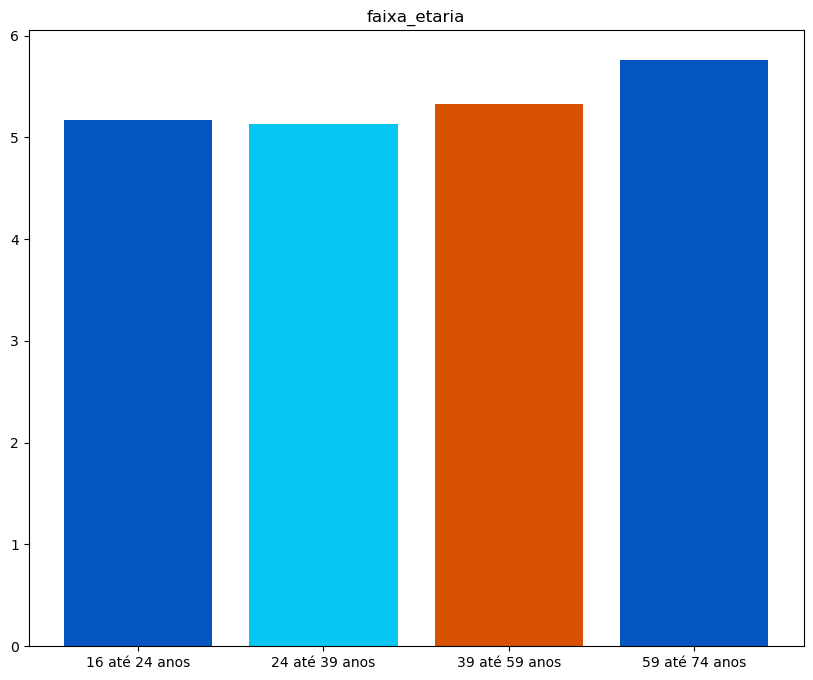

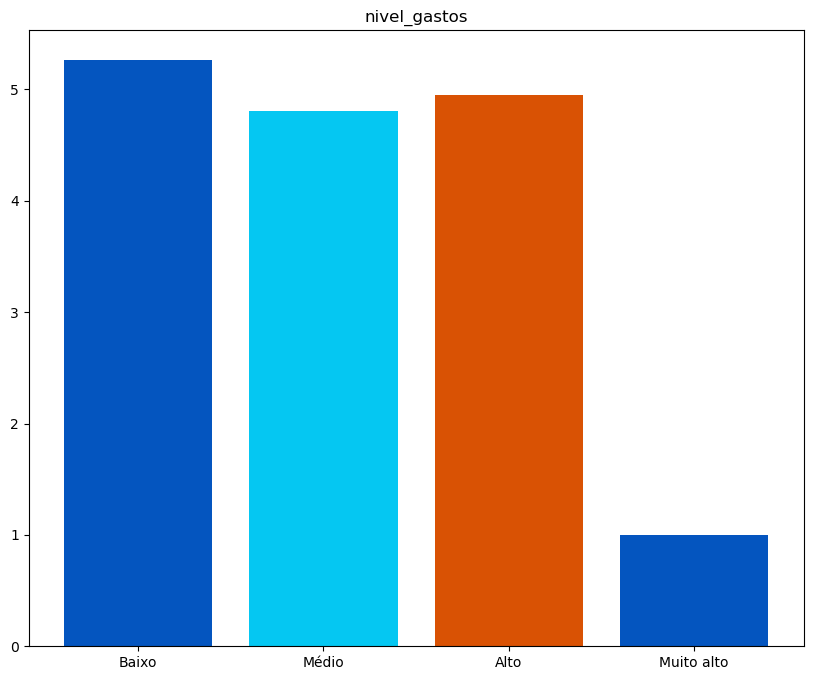

In [140]:
colunas = ['genero', 'bloco', 'faixa_etaria', 'nivel_gastos']
for coluna in colunas:
    df2 = df.groupby(coluna, as_index=False).agg({'aval_geral':'mean'})
    plt.figure(figsize=(10,8))
    plt.bar(df2[coluna], df2['aval_geral'], color=my_palette)
    if coluna == 'bloco':
        plt.xticks(rotation=30, ha='right')
    plt.title(coluna)
    plt.savefig(coluna+'.png', transparent=True)
    df2.to_json(coluna+'.json')
    plt.show()

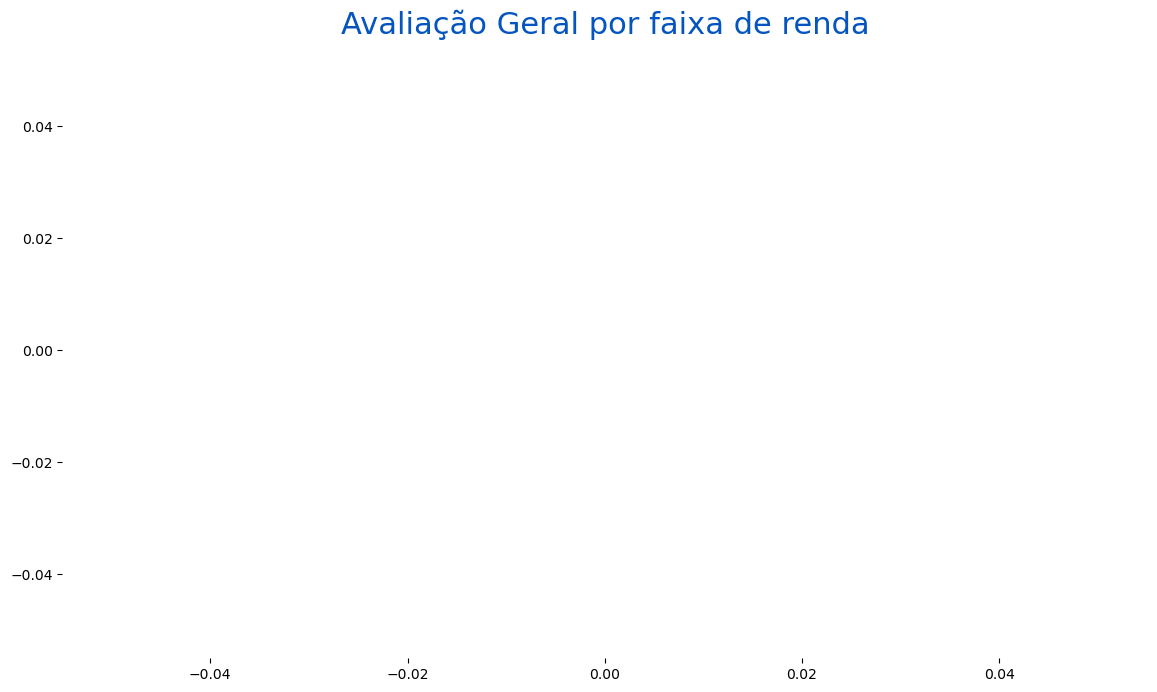

In [139]:
plt.figure(figsize=(14,8))
plt.barh(aval_renda['faixa_renda'], aval_renda['aval_geral'], color=my_palette)
plt.title('Avaliação Geral por faixa de renda', color='#0455BF', fontsize=22) 
plt.gca().grid(visible=False) 
plt.box(False)
plt.savefig('grafico_avaliacao_renda.png', transparent=True)

plt.show()

In [138]:
aval_renda.to_json(r'C:/Users/gabri/Downloads/aval_renda.json')

In [137]:
aval_renda = df.groupby('faixa_renda', as_index=False).agg({'aval_geral':'mean'})
aval_renda


,faixa_renda,aval_geral


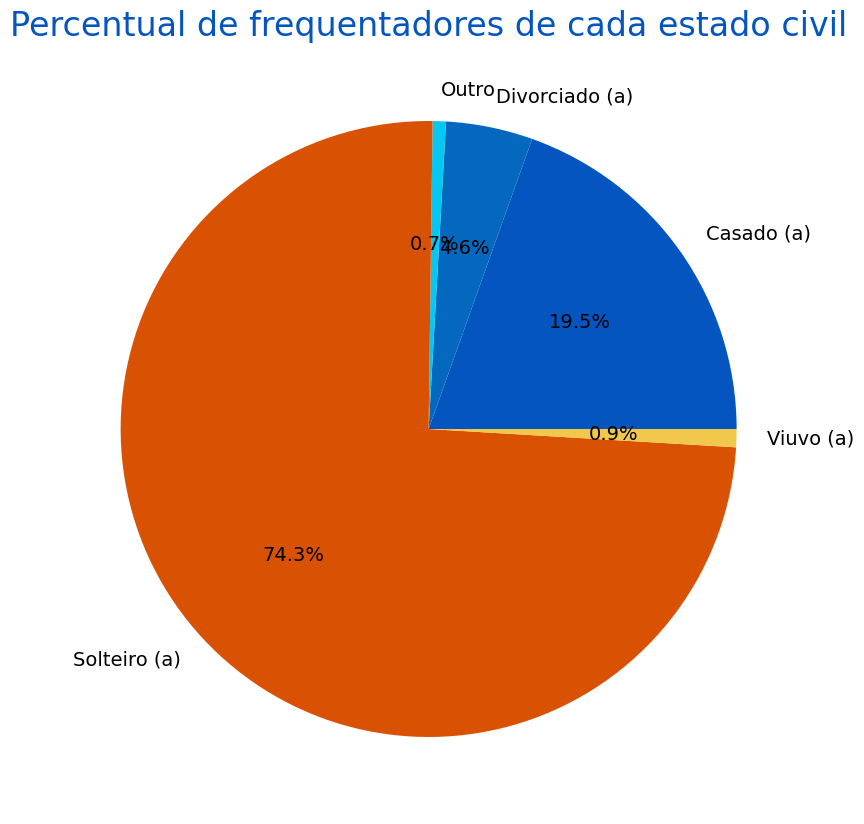

In [136]:
plt.figure(figsize=(12,10))
plt.pie(estado_civil['quantidade'], labels=estado_civil['estado_civil'].unique(), autopct='%1.1f%%', colors=['#0455BF', '#0468BF', '#05C7F2', '#D95204', '#F2C84C'], textprops={'fontsize': 14})
plt.title("Percentual de frequentadores de cada estado civil", fontsize=24 , color='#0455BF')
plt.show()

In [ ]:
data_dict = df.to_dict()

# Manipulando o dicionário para chegar ao formato desejado
result_dict = {
    'categories': list(data_dict['category'].values()),
    'data': list(data_dict['count'].values())
}

# Salvando o dicionário como um arquivo JSON
import json

with open('output.json', 'w') as f:
    json.dump(result_dict, f)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Unnamed: 0.2                1581 non-null   int64   
 1   level_0                     1581 non-null   int64   
 2   Unnamed: 0.1                1581 non-null   int64   
 3   index                       1581 non-null   int64   
 4   bloco_classificacao         1581 non-null   object  
 5   Unnamed: 0                  1581 non-null   int64   
 6   morador                     1581 non-null   object  
 7   numero_controle             1581 non-null   int64   
 8   bloco                       1581 non-null   object  
 9   dt_visita                   1581 non-null   object  
 10  dt_termino                  1581 non-null   object  
 11  tempo_total_entrev          1581 non-null   object  
 12  idade                       1581 non-null   int64   
 13  pais              

In [126]:
# Comparando gastos financeiros com características pessoais.
financeiro=['int_renda','gasto_total', 't_hospedagem.1', 'alimentacao', 't_atrativos_passeios', 'transporte_interno', 'compras', 'ingressos', 'outros', 'total']
pessoal=['idade', 'aval_geral', 'aval_banheiros', 'aval_seguranca', 'aval_precos']

In [127]:
df.corr().loc[financeiro, pessoal]

,idade,aval_geral,aval_banheiros,aval_seguranca,aval_precos
int_renda,0.111156,-0.021273,0.032325,0.141882,-0.006964
gasto_total,0.049281,-0.069643,0.052113,0.115021,0.028324
t_hospedagem.1,0.071481,-0.162523,0.074958,0.022498,-0.296854
alimentacao,0.047047,-0.030498,0.041357,0.112095,0.086580
t_atrativos_passeios,0.060464,-0.106869,-0.035037,0.055591,-0.103041
transporte_interno,0.056136,-0.041464,-0.021815,0.038745,0.020050
compras,0.058425,-0.020453,0.062674,0.092075,0.059206
ingressos,-0.041746,-0.048186,-0.000764,0.036795,0.002124
outros,0.067911,-0.045972,-0.011180,0.039547,-0.033499
total,0.056248,-0.064628,0.053156,0.119565,0.034001


<AxesSubplot:>

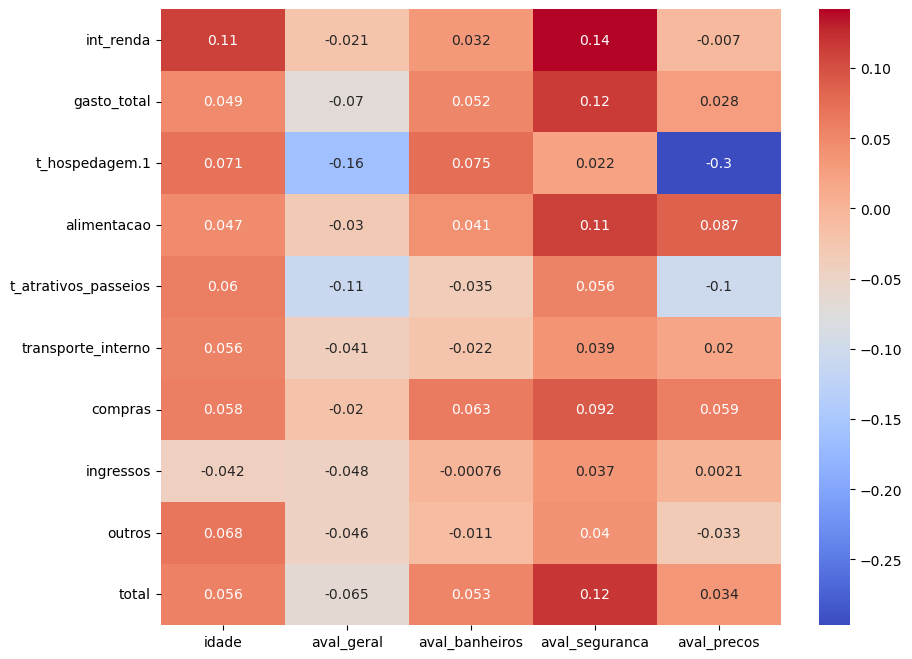

In [128]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr().loc[financeiro, pessoal], annot=True, cmap='coolwarm', ax=ax)


In [129]:
#Quanto maior os gastos, menor a avaliação geral

In [130]:
renda=df.pivot_table(index=['int_renda', 'genero'], values='aval_geral', aggfunc='mean')

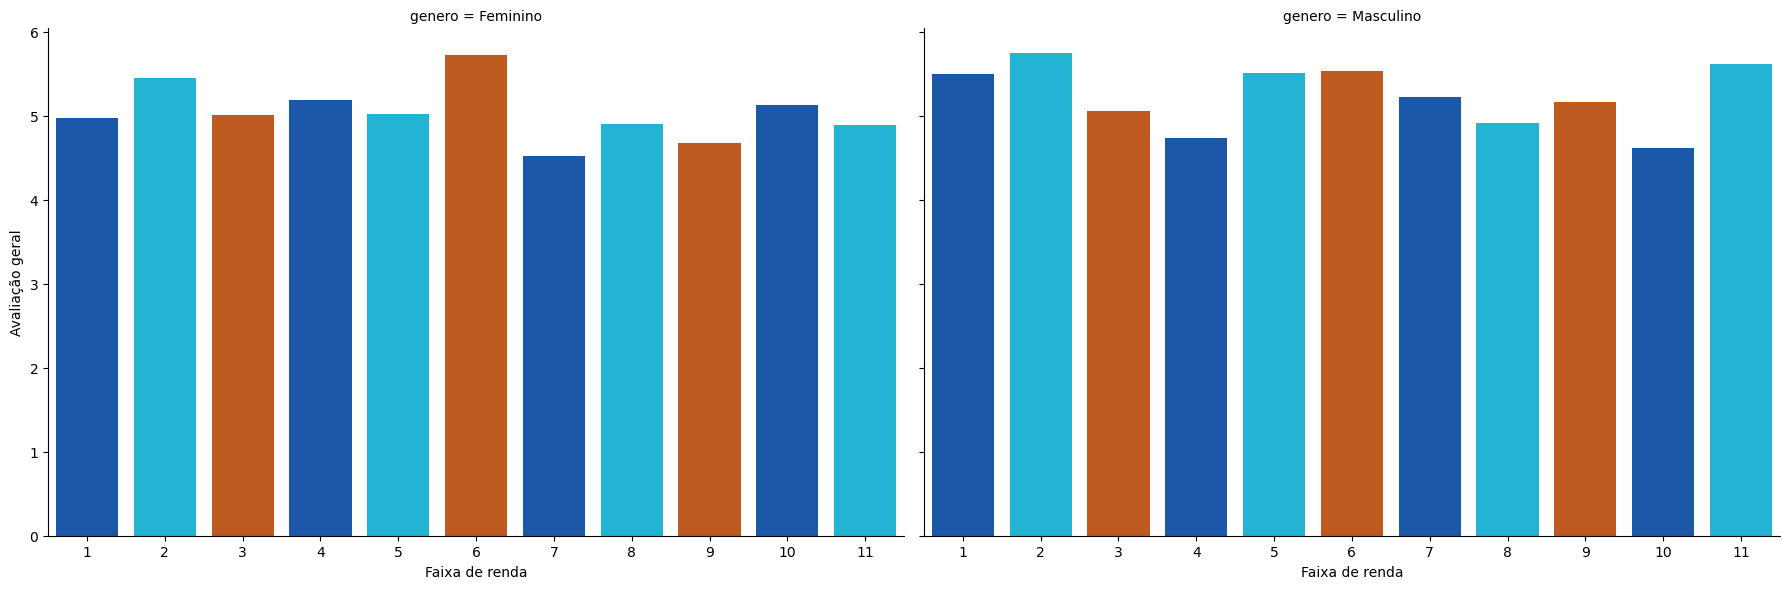

In [131]:

g = sns.catplot(x='int_renda', y='aval_geral', kind='bar', data=df, col='genero', ci=None, palette=my_palette, height=6, aspect=1.5)
g.set_axis_labels('Faixa de renda', 'Avaliação geral')

plt.show()


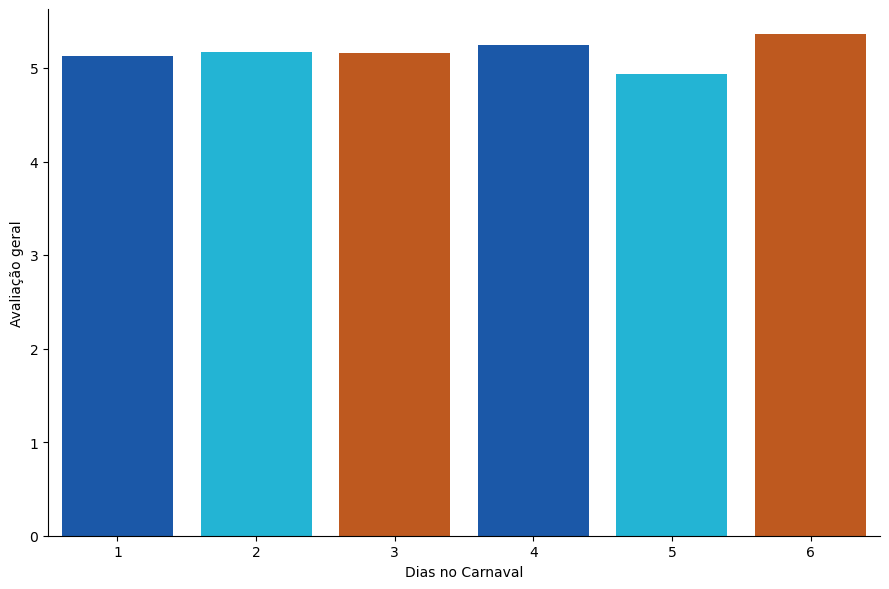

In [132]:
g = sns.catplot(x='dias_carnaval', y='aval_geral', kind='bar', data=df, ci=None, palette=my_palette, height=6, aspect=1.5)
g.set_axis_labels('Dias no Carnaval', 'Avaliação geral')


In [137]:
data_dict = df.to_dict()

# Manipulando o dicionário para chegar ao formato desejado
result_dict = {
    'categories': list(data_dict[''].values()),
    'data': list(data_dict['count'].values())
}

# Salvando o dicionário como um arquivo JSON
import json

with open('output.json', 'w') as f:
    json.dump(result_dict, f)

,faixa_renda,aval_geral


In [133]:
blocos=df.pivot_table(index='bloco', values='aval_geral', aggfunc='mean')

In [134]:
blocos

,aval_geral
bloco,
Baianas Ozadas,5.106870
Bloco Angola Janga,4.590164
Bloco Despedida de Carnaval,5.860870
Bloco Havayanas Usadas,7.035714
Entao Brilha,5.758621
Juventude Bronzeada,5.242105
MONOBLOCO,4.347015
Outros,5.505435
Quando come se lambuza,4.458824


In [167]:
# Gerando um dicionário a partir do DataFrame
data_dict = blocos.to_dict()

# Obtendo as categorias a partir das chaves do dicionário 'aval_geral'
categories = list(data_dict['aval_geral'].keys())

# Manipulando o dicionário para chegar ao formato desejado
result_dict = {
    'categories': categories,
    'data': list(data_dict['aval_geral'].values())
}

# Salvando o dicionário como um arquivo JSON
import json

with open('arquivo.json', 'w') as f:
    json.dump(result_dict, f)

In [135]:
# Criando a tabela com número de pessoas por estado civil e calculando o percentual do total de cada um
estado_civil = df.groupby('estado_civil', as_index=False).agg({'numero_controle':'nunique'})
estado_civil.columns = ['estado_civil', 'quantidade']
estado_civil['percentual_do_total'] = (estado_civil['quantidade']/estado_civil['quantidade'].sum())*100
estado_civil

,estado_civil,quantidade,percentual_do_total
0,Casado (a),309,19.544592
1,Divorciado (a),72,4.554080
2,Outro,11,0.695762
3,Solteiro (a),1174,74.256799
4,Viuvo (a),15,0.948767


In [145]:
df['t_gastronomia'][df['morador']=='Visitantes']

12      False
37      False
49      False
54      False
58      False
        ...  
1536    False
1560    False
1567    False
1569    False
1580    False
Name: t_gastronomia, Length: 218, dtype: object

In [151]:
df.faixa_renda.unique()

array([nan], dtype=object)

In [150]:
top10=df['bloco'].value_counts().nlargest(10).index.to_list()
df.loc[~df['bloco'].isin(top10),'bloco']= 'Outros' 

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Unnamed: 0.2                1581 non-null   int64   
 1   level_0                     1581 non-null   int64   
 2   Unnamed: 0.1                1581 non-null   int64   
 3   index                       1581 non-null   int64   
 4   bloco_classificacao         1581 non-null   object  
 5   Unnamed: 0                  1581 non-null   int64   
 6   morador                     1581 non-null   object  
 7   numero_controle             1581 non-null   int64   
 8   bloco                       1581 non-null   object  
 9   dt_visita                   1581 non-null   object  
 10  dt_termino                  1581 non-null   object  
 11  tempo_total_entrev          1581 non-null   object  
 12  idade                       1581 non-null   int64   
 13  pais              

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Unnamed: 0.2                1581 non-null   int64   
 1   level_0                     1581 non-null   int64   
 2   Unnamed: 0.1                1581 non-null   int64   
 3   index                       1581 non-null   int64   
 4   bloco_classificacao         1581 non-null   object  
 5   Unnamed: 0                  1581 non-null   int64   
 6   morador                     1581 non-null   object  
 7   numero_controle             1581 non-null   int64   
 8   bloco                       1581 non-null   object  
 9   dt_visita                   1581 non-null   object  
 10  dt_termino                  1581 non-null   object  
 11  tempo_total_entrev          1581 non-null   object  
 12  idade                       1581 non-null   int64   
 13  pais              

In [155]:
df['faixa_renda'].unique()

array([nan], dtype=object)

In [46]:
# Dicionário com os intervalos e seus respectivos valores inteiros
intervalos = {
    'Ate um salario minimo (R$ 954,00 )': 1,
    'de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)': 2,
    'de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)': 3,
    'de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)': 4,
    'de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)': 5,
    'de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)': 6,
    'de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)': 7,
    'de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)': 8,
    'de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)': 9,
    'de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)': 10,
    'Acima de 10 salarios (acima de R$ 9540,00)': 11
}
df['faixa_renda']=df['faixa_renda'].astype(str)
df['int_renda'] = df['faixa_renda'].apply(lambda x: intervalos[x])

KeyError: 'De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)'

In [11]:
# Dicionário com os intervalos e seus respectivos valores inteiros
intervalos = {
    'Ate um salario minimo (R$ 954,00 )': 1,
    'de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)': 2,
    'de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)': 3,
    'de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)': 4,
    'de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)': 5,
    'de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)': 6,
    'de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)': 7,
    'de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)': 8,
    'de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)': 9,
    'de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)': 10,
    'Acima de 10 salarios (acima de R$ 9540,00)': 11
}
df['faixa_renda']=df['faixa_renda'].astype(str)
df['int_renda'] = df['faixa_renda'].apply(lambda x: intervalos[x])




KeyError: 'De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)'